In [90]:
%config Completer.use_jedi = False
import re
import json
import requests
import zipfile
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def unzip_arquivo(link, caminho):
    resposta = requests.get(link)
    with zipfile.ZipFile(io.BytesIO(resposta.content)) as zf:
        zf.extractall(caminho)

def info_dados(df):
    columns = df.columns
    for column in columns:
        print(f'Column: {column}')
        print(df[column].unique(), f'Shape: {df[column].unique().shape[0]}', df[column].dtype)

In [2]:
url = "https://github.com/alura-cursos/introducao-a-data-science/blob/aula0/aula0/ml-latest-small.zip?raw=true"
caminho = "../src/data/"
unzip_arquivo(url,caminho)

# EDA1

In [3]:
notas = pd.read_csv('../src/data/ml-latest-small/ratings.csv')

In [4]:
notas.columns = ['usuarioid','filmeid','nota','momento']

In [5]:
info_dados(notas)

Column: usuarioid
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 

In [7]:
notas.isna().sum()

usuarioid    0
filmeid      0
nota         0
momento      0
dtype: int64

In [8]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   usuarioid  100836 non-null  int64  
 1   filmeid    100836 non-null  int64  
 2   nota       100836 non-null  float64
 3   momento    100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [9]:
notas.describe()

,usuarioid,filmeid,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [35]:
notas.nota.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

<AxesSubplot: ylabel='Frequency'>

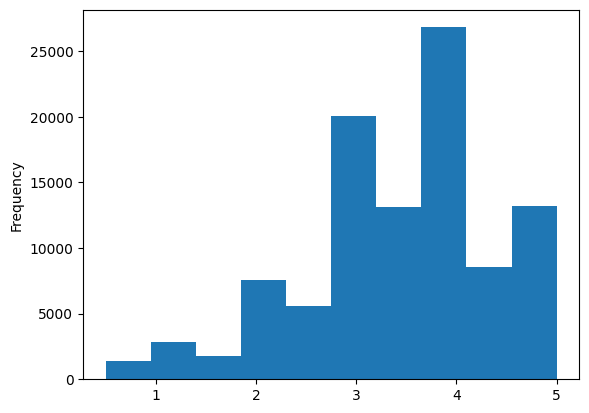

In [33]:
notas.nota.plot(kind='hist')

In [38]:
notas.nota.median()

3.5

<AxesSubplot: >

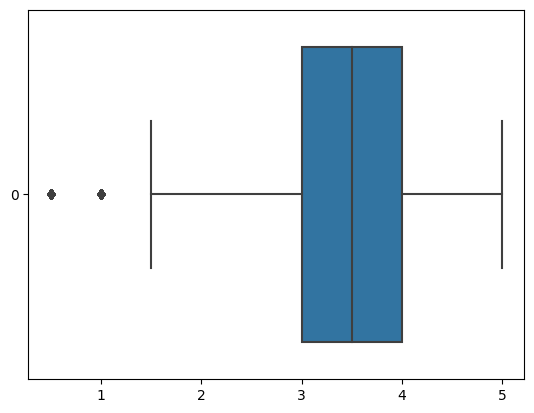

In [42]:
sns.boxplot(notas.nota, orient='h')

In [43]:
filmes = pd.read_csv('../src/data/ml-latest-small/movies.csv')
filmes.columns = ['filmeid','titulo','generos']
filmes.head()

,filmeid,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [45]:
notas.query('filmeid==1').nota.mean()

3.9209302325581397

In [49]:
medias_filme = notas.groupby('filmeid').mean()[['nota']]

array([[<AxesSubplot: title={'center': 'nota'}>]], dtype=object)

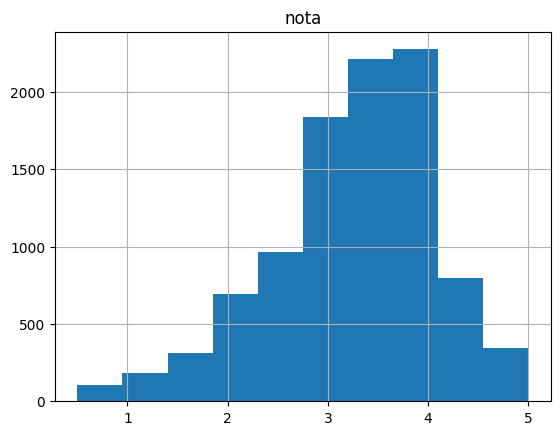

In [50]:
medias_filme.hist()

In [51]:
medias_filme.describe()

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


<AxesSubplot: >

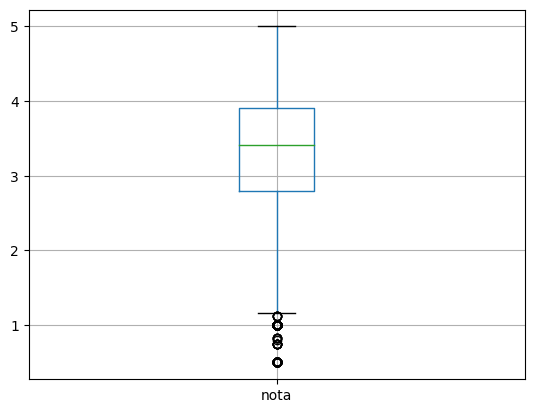

In [54]:
medias_filme.boxplot()

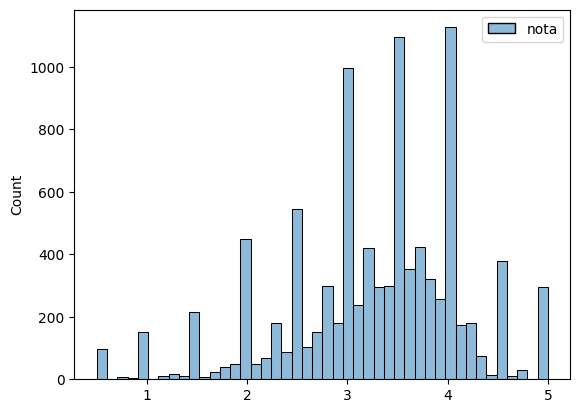

In [60]:
plt.figure()
sns.histplot(medias_filme)
plt.show()

# EDA 2

In [10]:
import opendatasets as od

In [11]:
od.download_kaggle_dataset(dataset_url="kaggle.com/datasets/tmdb/tmdb-movie-metadata",data_dir=caminho)

Skipping, found downloaded files in "../src/data/tmdb-movie-metadata" (use force=True to force download)


In [552]:
tmdb = pd.read_csv('../src/data/tmdb-movie-metadata/tmdb_5000_movies.csv')
tmdb.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [13]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [14]:
tmdb.budget.describe()

count    4.803000e+03
mean     2.904504e+07
std      4.072239e+07
min      0.000000e+00
25%      7.900000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [15]:
contagem_de_linguas = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_linguas.columns = ['original_language','total']
contagem_de_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<AxesSubplot: xlabel='original_language', ylabel='total'>

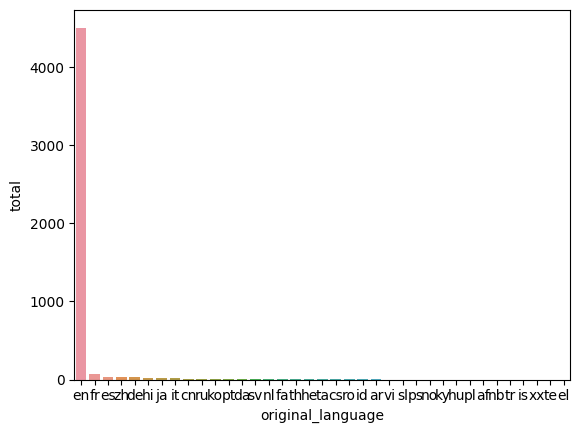

In [16]:
sns.barplot(data=contagem_de_linguas,x = 'original_language',y='total')

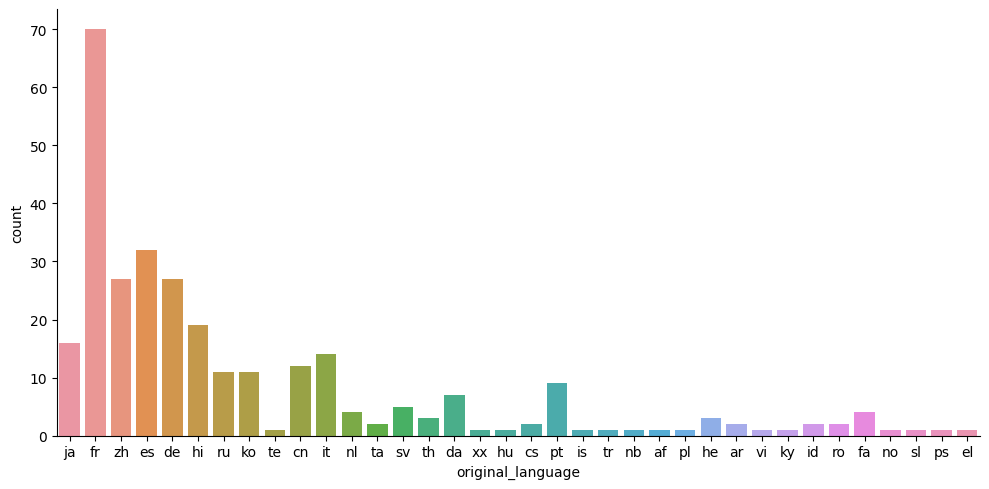

In [51]:
sns.catplot(x='original_language', 
            kind='count', 
            data = tmdb[tmdb['original_language'] != 'en'],
            aspect=2)

In [87]:
total_por_lingua = tmdb.original_language.value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua['en']
total_resto = total_geral-total_ingles

In [93]:
dados_lingua = {
    "lingua":["ingles","outros"],
    "total":[total_ingles,total_resto]
}
dados_lingua = pd.DataFrame(dados_lingua)

<AxesSubplot: xlabel='lingua', ylabel='total'>

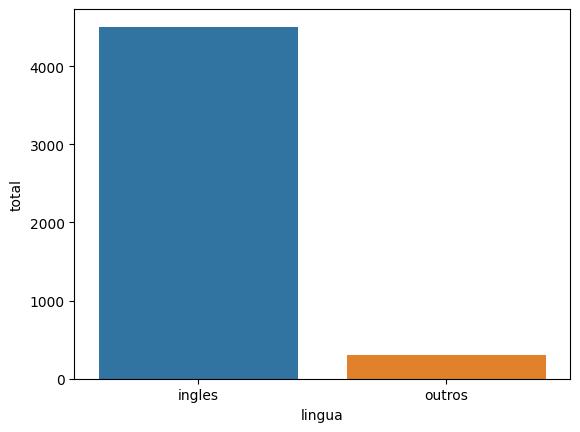

In [99]:
sns.barplot(data=dados_lingua,x='lingua',y='total')

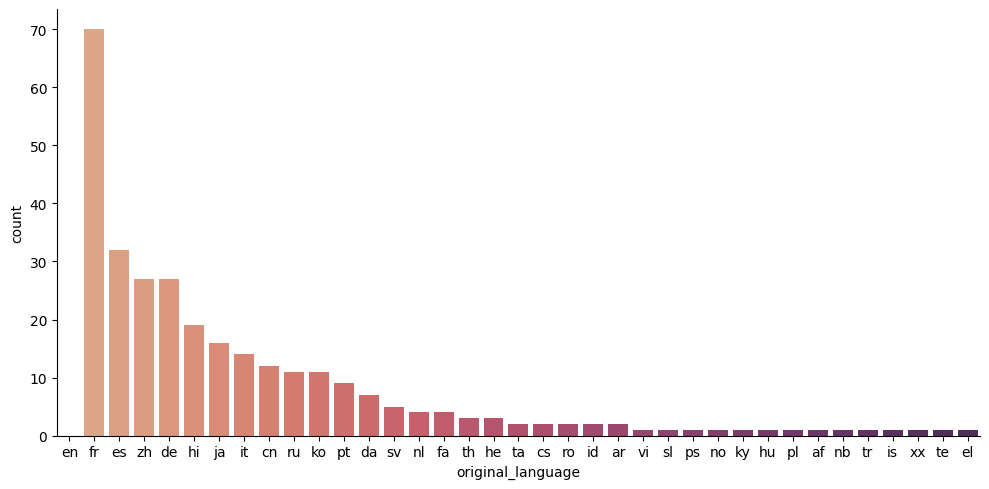

In [138]:
filmes_outras_linguas = tmdb.query('original_language != "en"')
sns.catplot(data = filmes_outras_linguas, x='original_language', kind='count', 
            height=5, aspect=2,order=total_por_lingua.index, palette='flare')


In [140]:
filmes.head(2)

,filmeid,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [142]:
notas_filme1 = notas.query('filmeid==1')
notas_filme2 = notas.query('filmeid==2')

In [150]:
print('%.2f' % notas_filme1['nota'].mean())
print('%.2f' % notas_filme2['nota'].mean())

3.92
3.43


In [152]:
print('%.2f' % notas_filme1['nota'].median())
print('%.2f' % notas_filme2['nota'].median())

4.00
3.50


<AxesSubplot: xlabel='nota'>

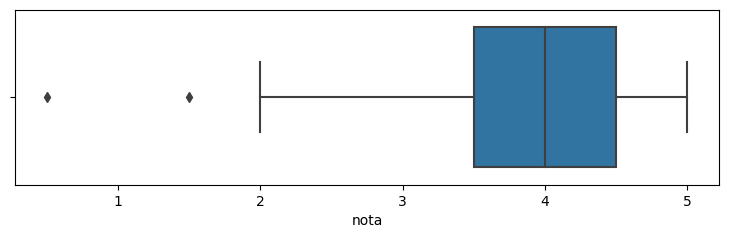

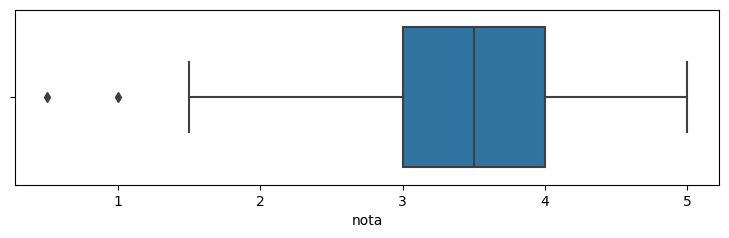

In [181]:
plt.figure(figsize=(20,5))
plt.subplot(2,2,1)
sns.boxplot(x=notas_filme1.nota)

plt.figure(figsize=(20,5))
plt.subplot(2,2,2)
sns.boxplot(x=notas_filme2.nota)

<AxesSubplot: xlabel='nota', ylabel='filmeid'>

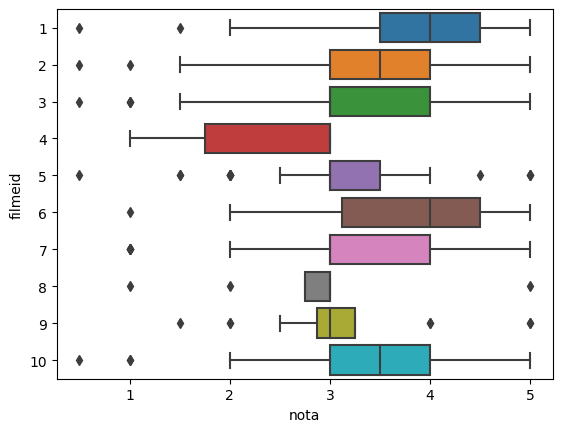

In [206]:
sns.boxplot(y='filmeid', x='nota', data=notas.query("filmeid in [1,2,3,4,5,6,7,8,9,10]"), orient='h')

In [59]:
tmdb.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [110]:
def acha_genero(genero_str):
    lista_genero = re.findall(r'"name":\s*"([^"]*)"',genero_str)
    return lista_genero

In [553]:
tmdb['generos'] = tmdb.genres.apply(acha_genero)
tmdb.generos.head()

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
Name: generos, dtype: object

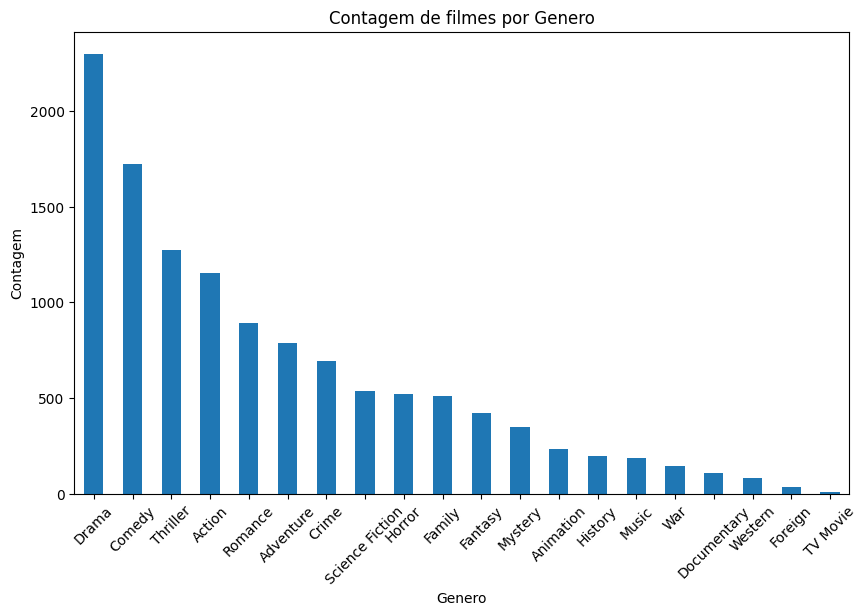

In [554]:
plt.figure(figsize=(10, 6))
tmdb.generos.explode().value_counts().plot(kind='bar')
plt.title('Contagem de filmes por Genero')
plt.xlabel('Genero')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

In [306]:
tmdb['Ano'] = tmdb.release_date.str.extract(r'(\d{4})')
tmdb['Ano'].head()

0    2009
1    2007
2    2015
3    2012
4    2012
Name: Ano, dtype: object

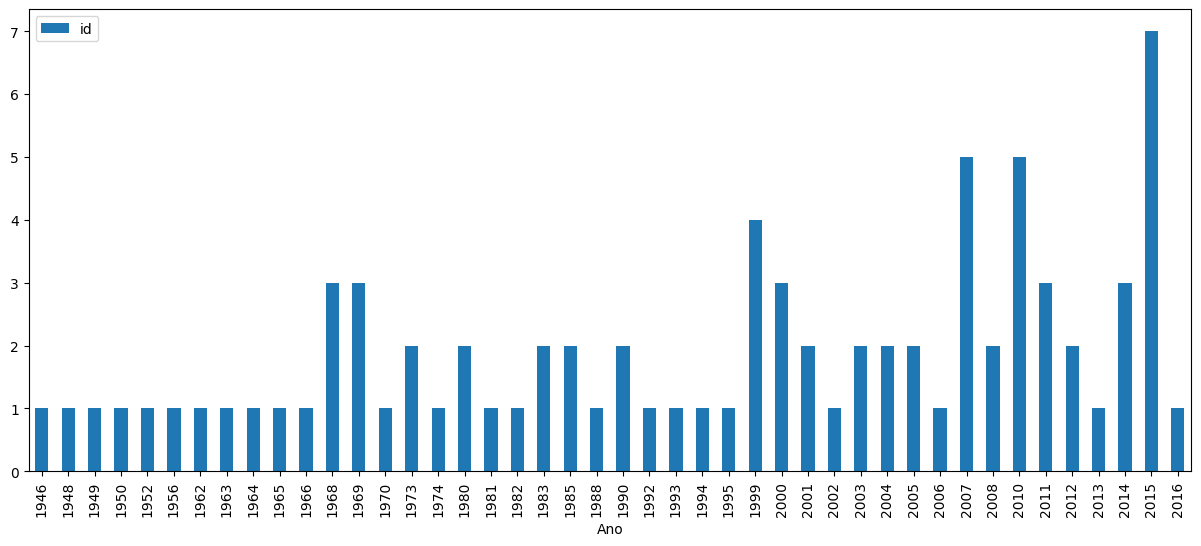

In [545]:
aux = tmdb[['Ano','generos',tmdb.columns[3]]]
aux = aux.explode('generos')
aux = aux.groupby(['generos','Ano'],).count()
aux = aux.reset_index()
tmp = aux.loc[aux.generos == 'Western']
tmp.plot(kind='bar',figsize=(15,6),x='Ano',y='id')
plt.xticks(rotation=90)
plt.show()


In [510]:
aux.generos.unique()

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype=object)

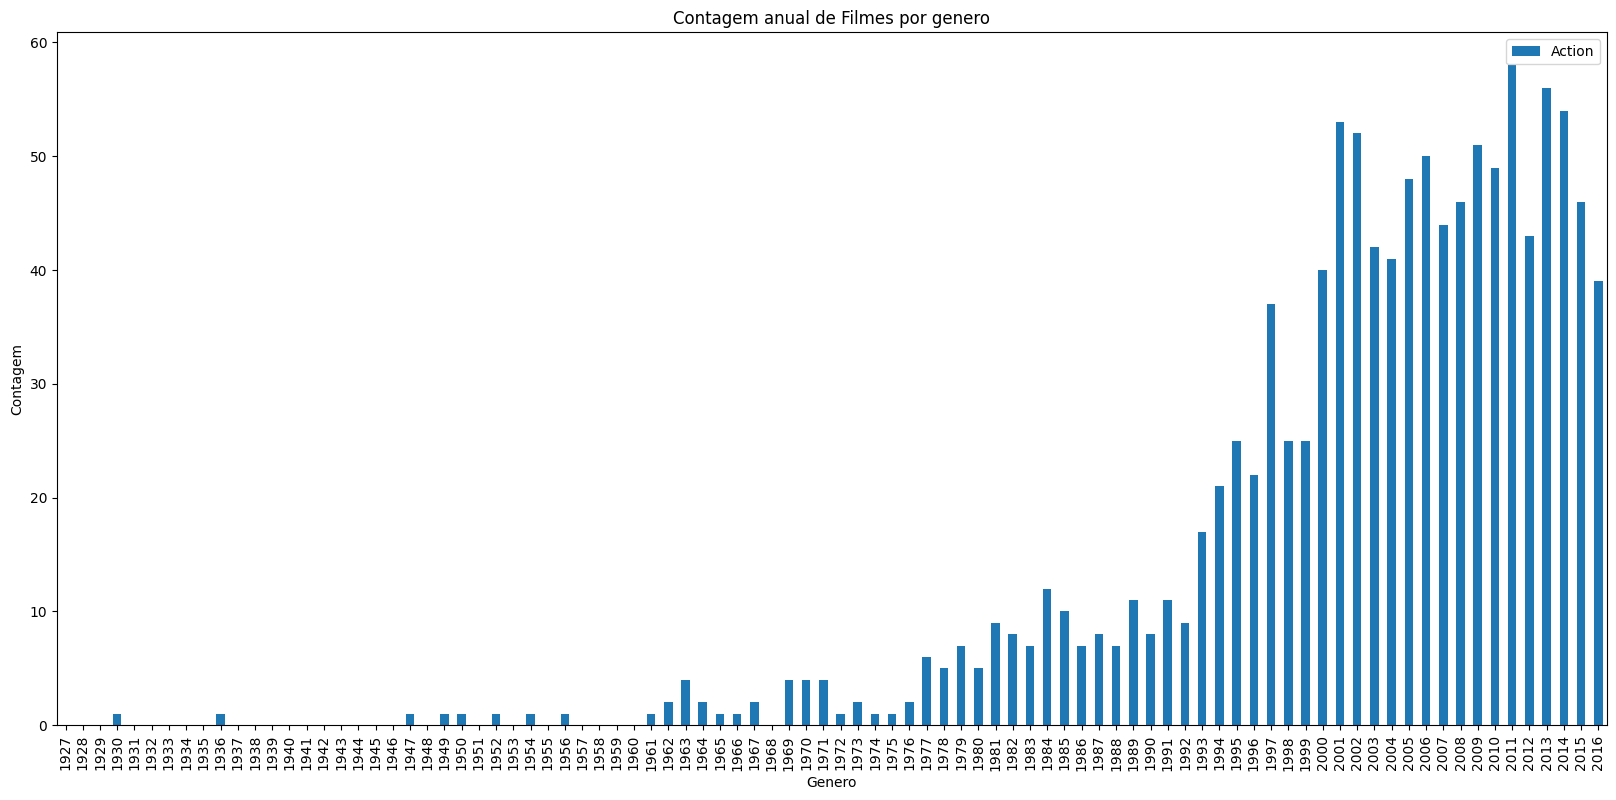

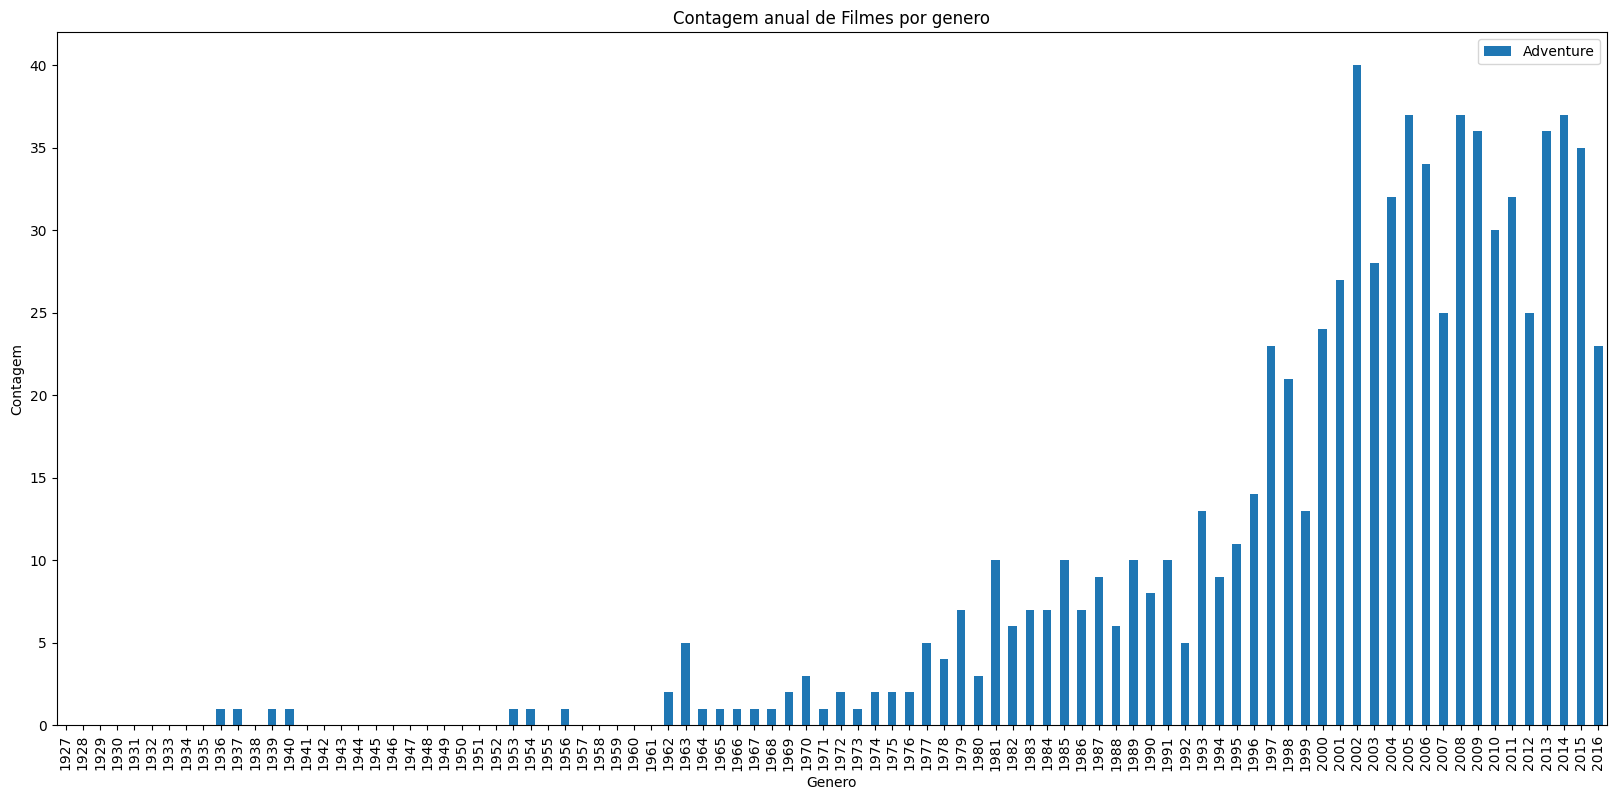

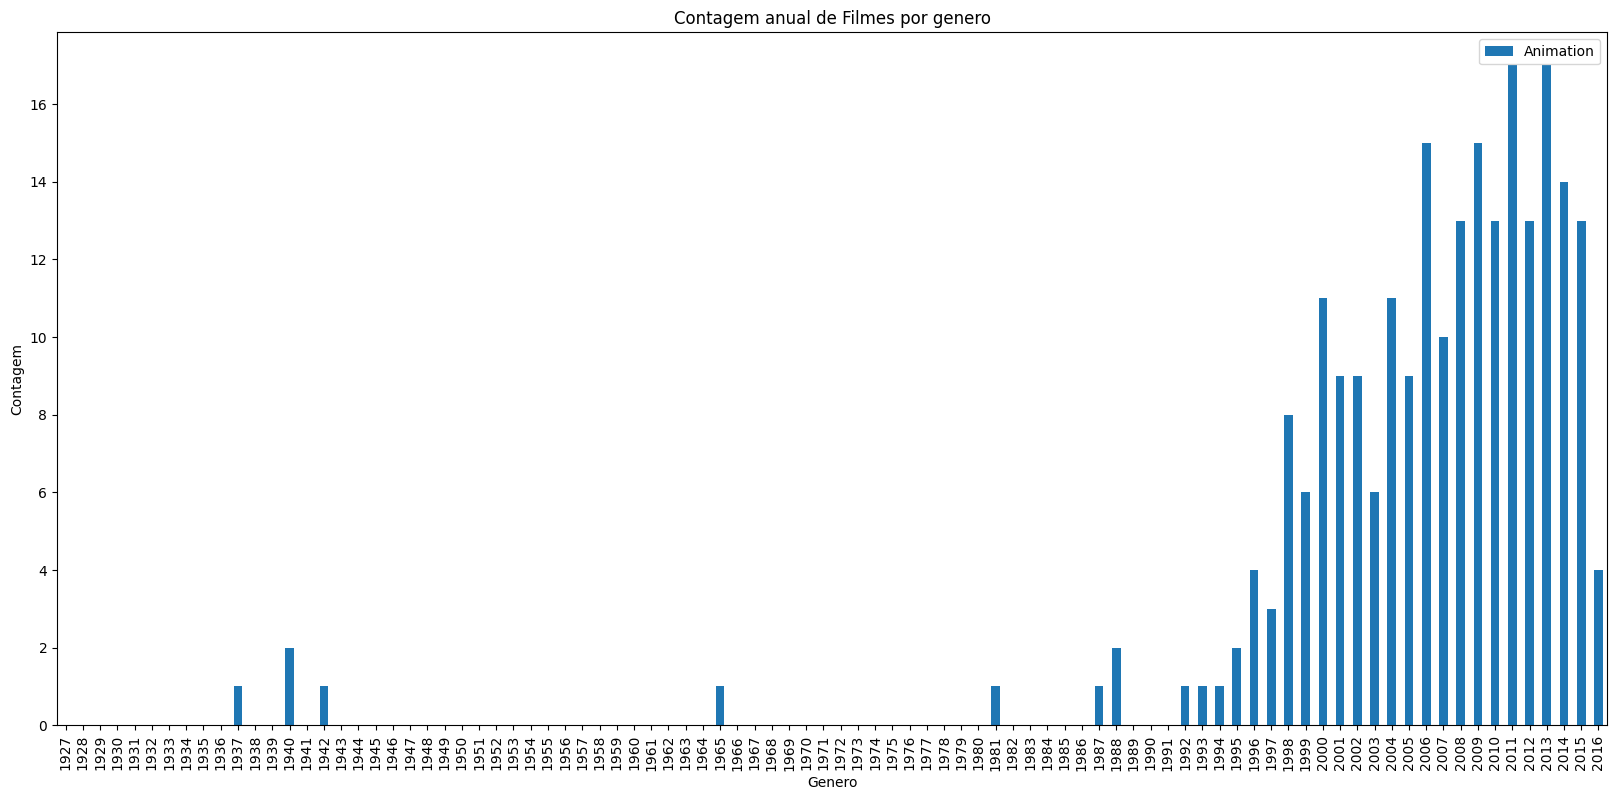

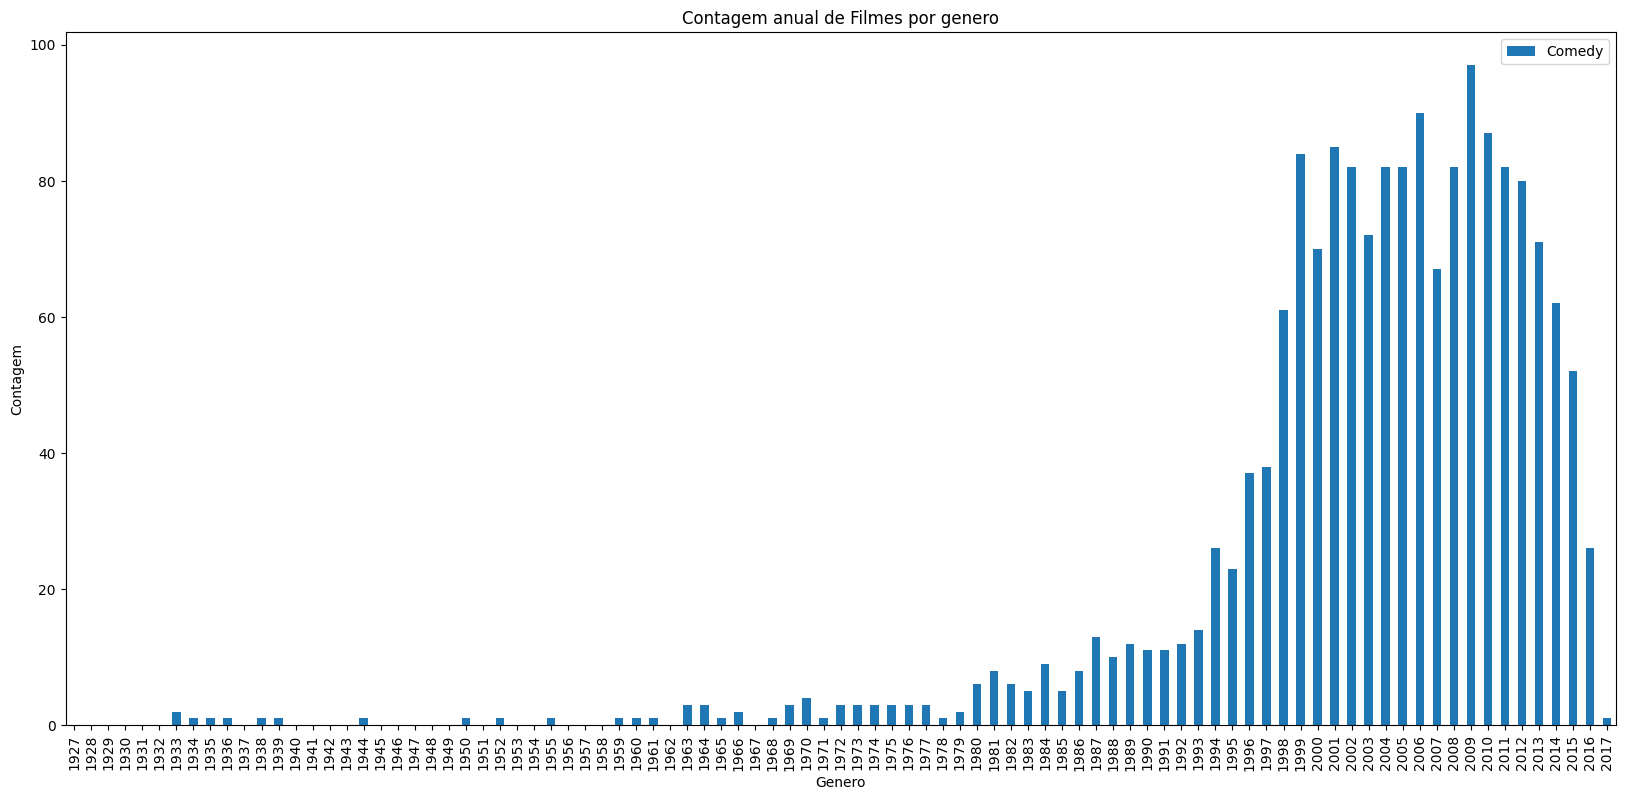

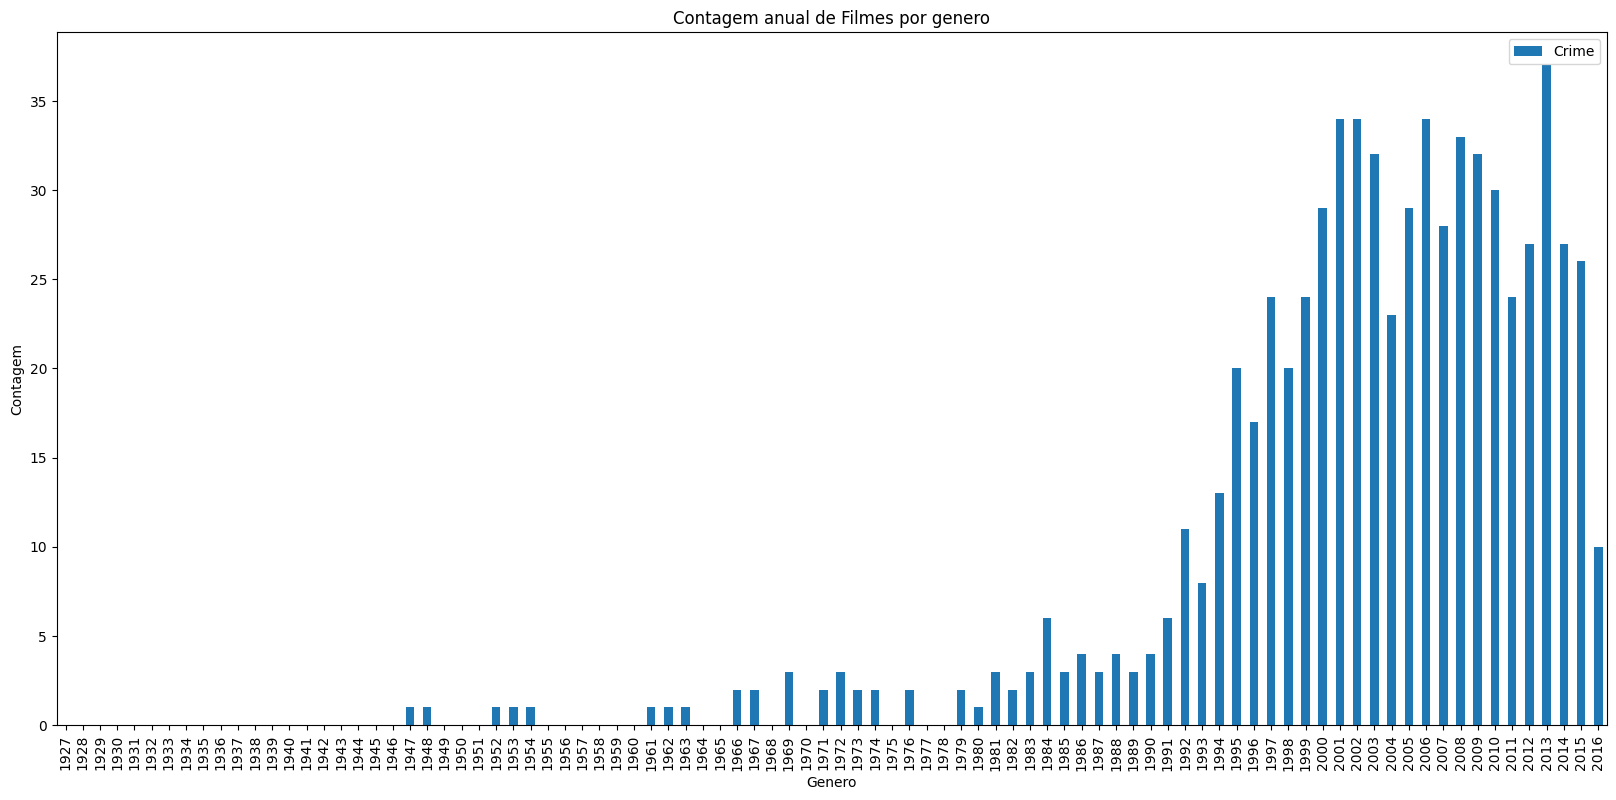

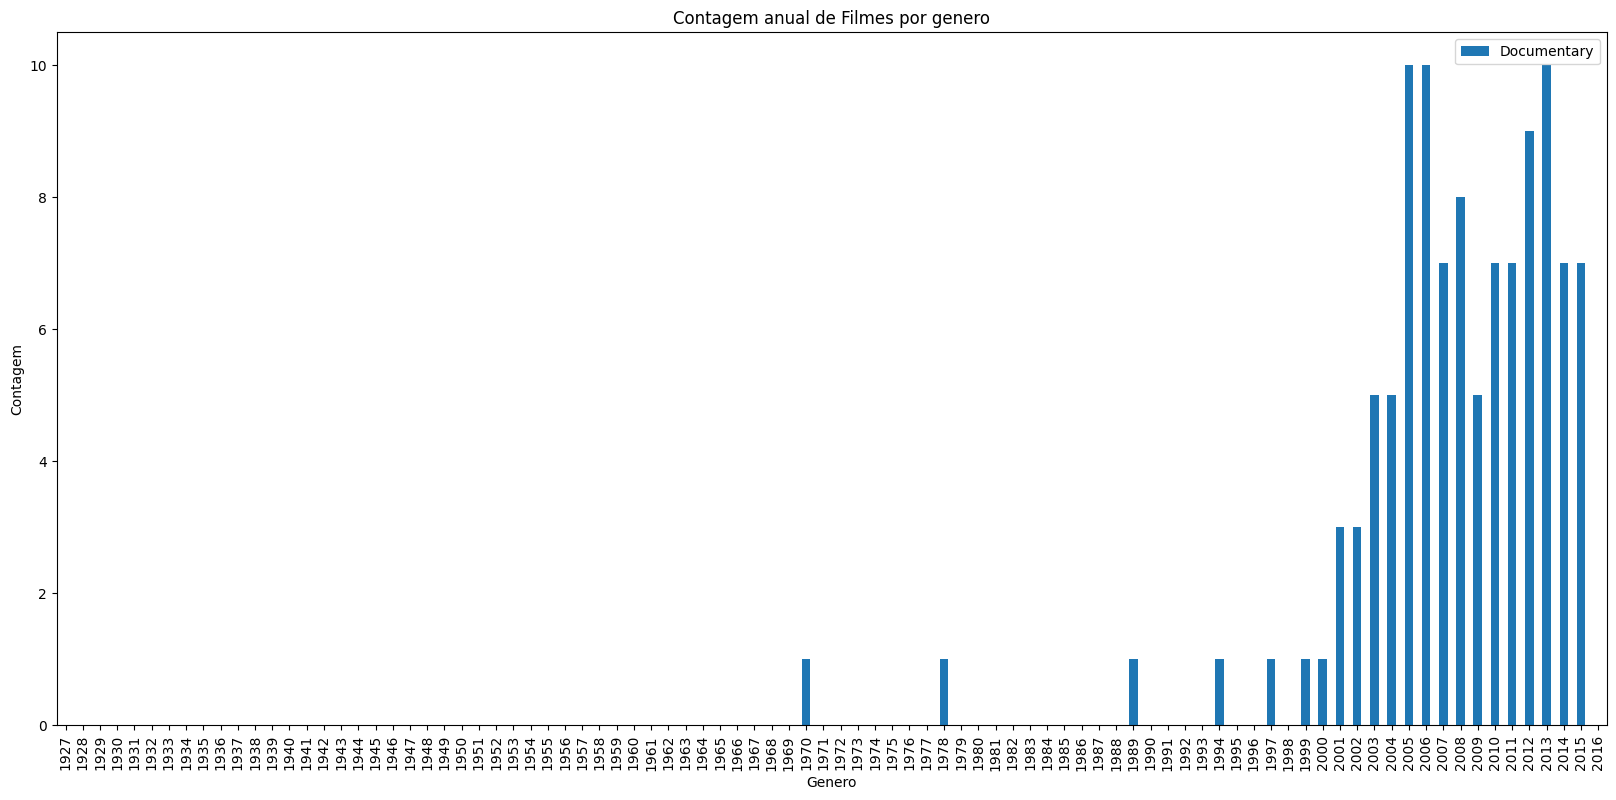

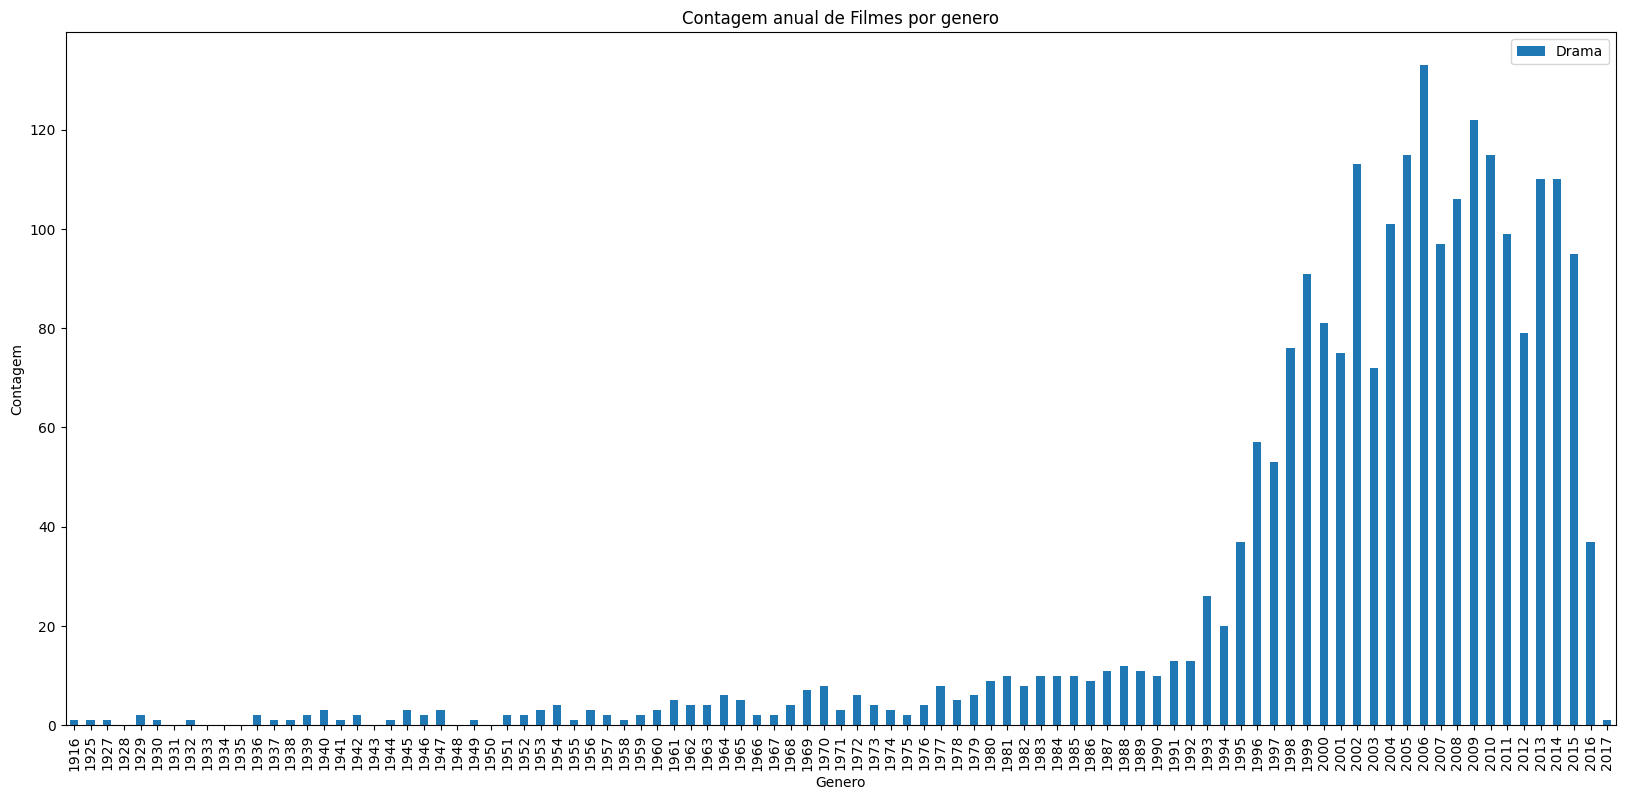

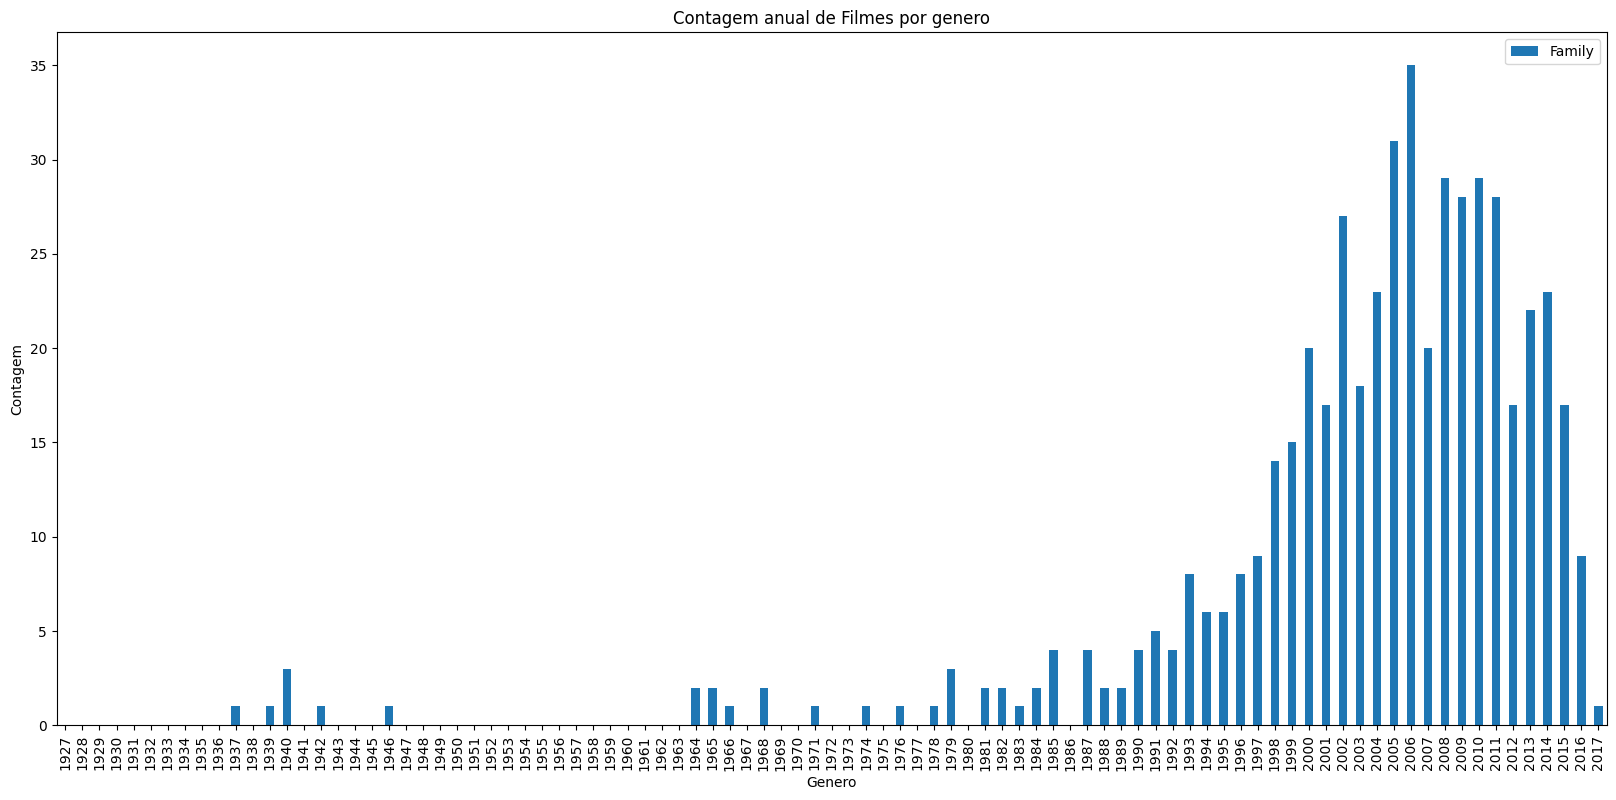

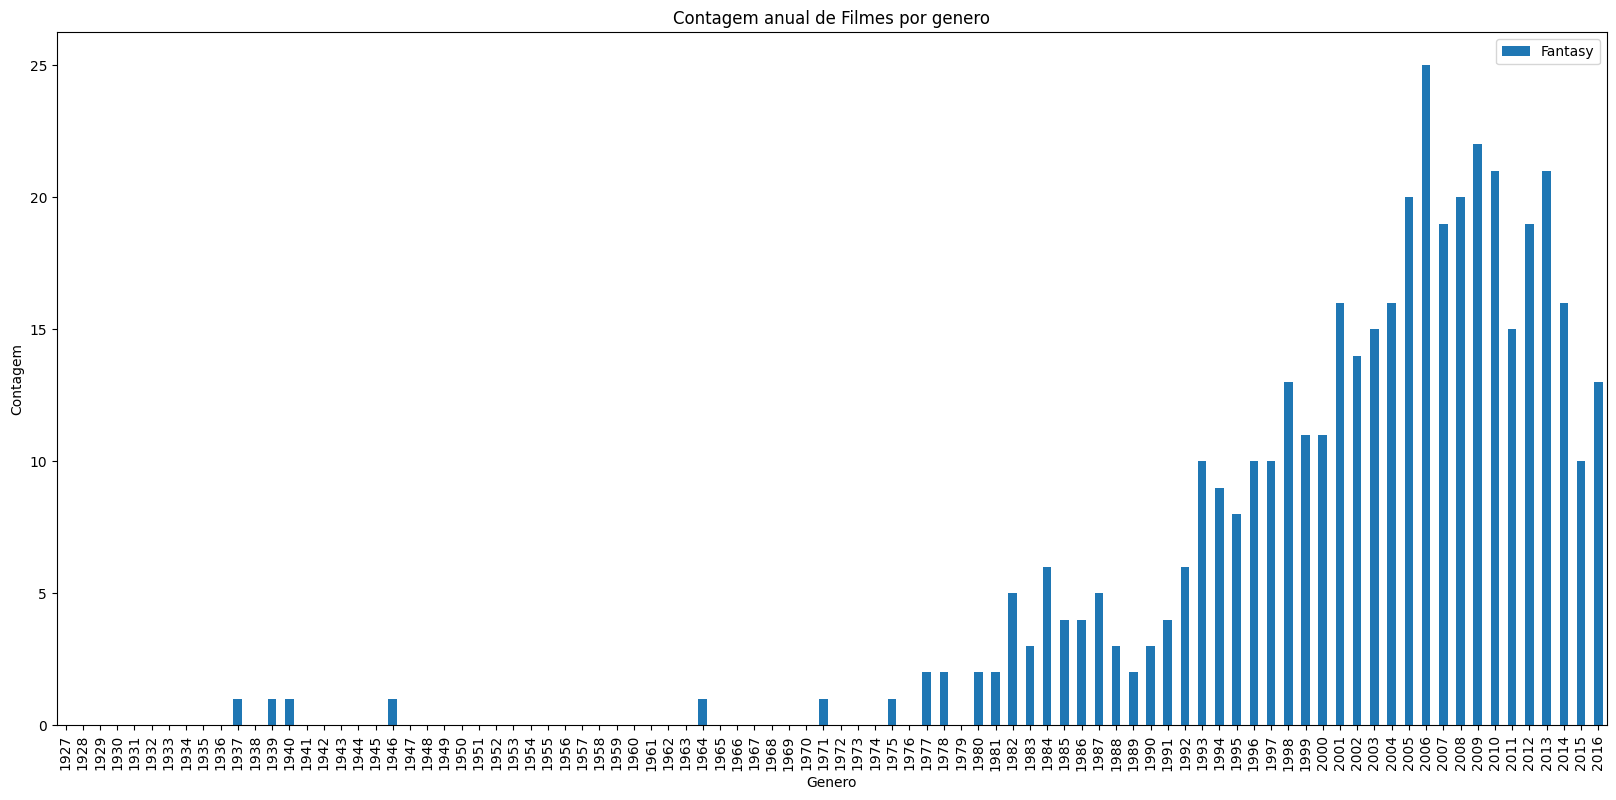

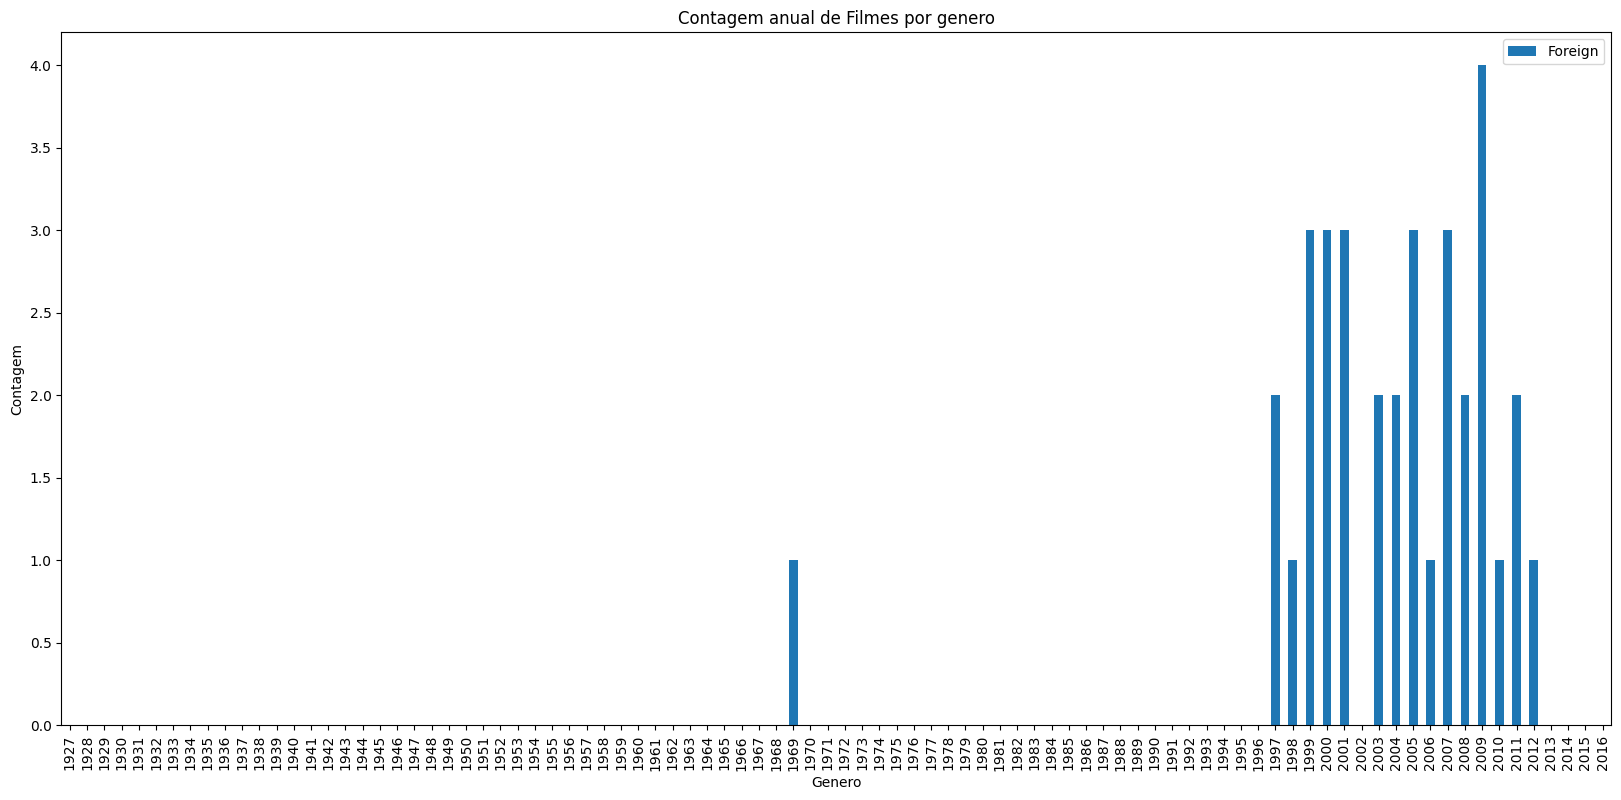

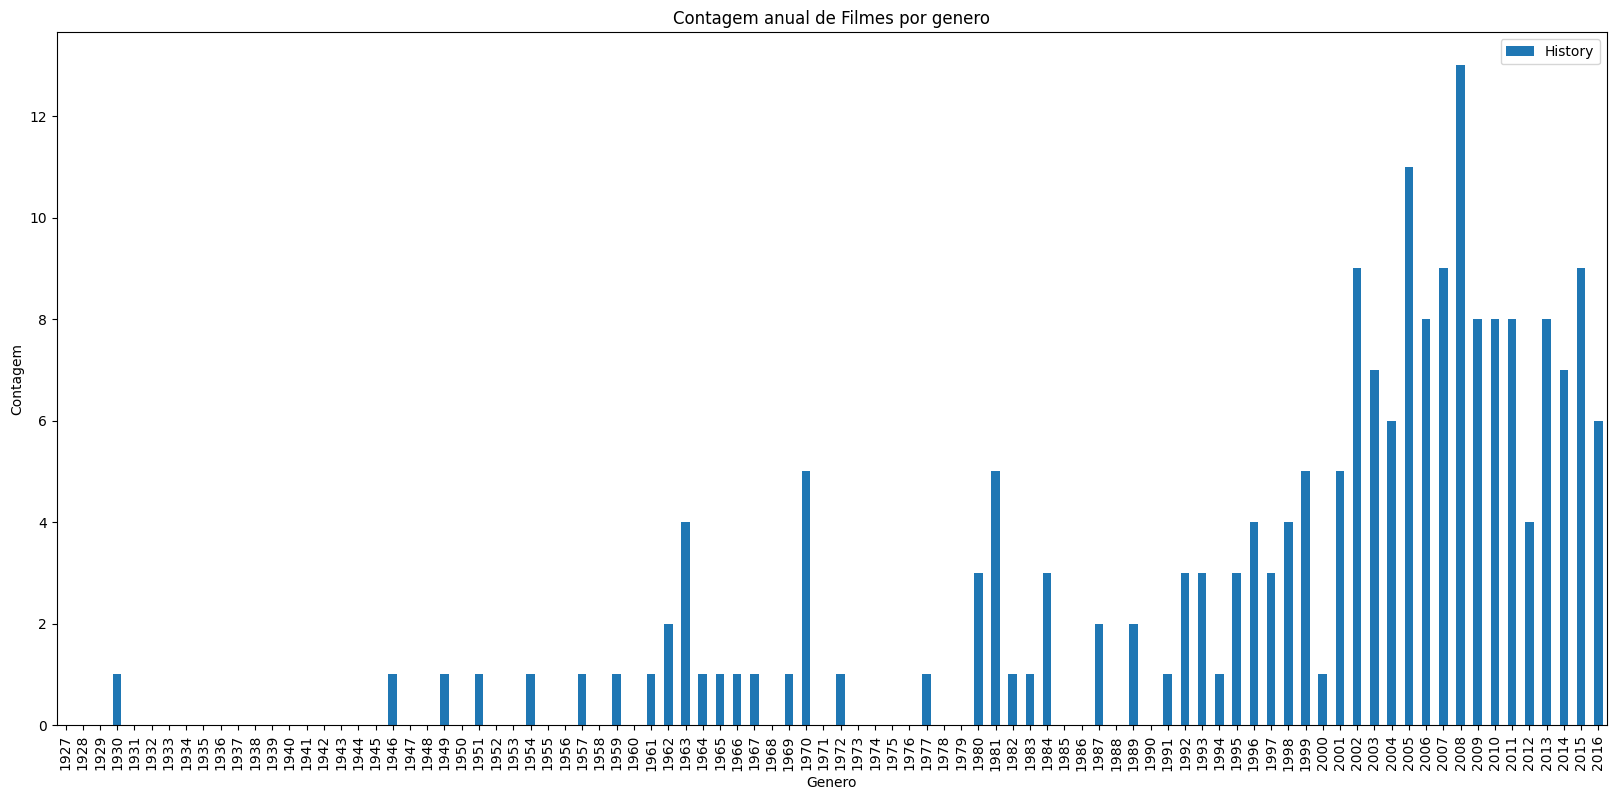

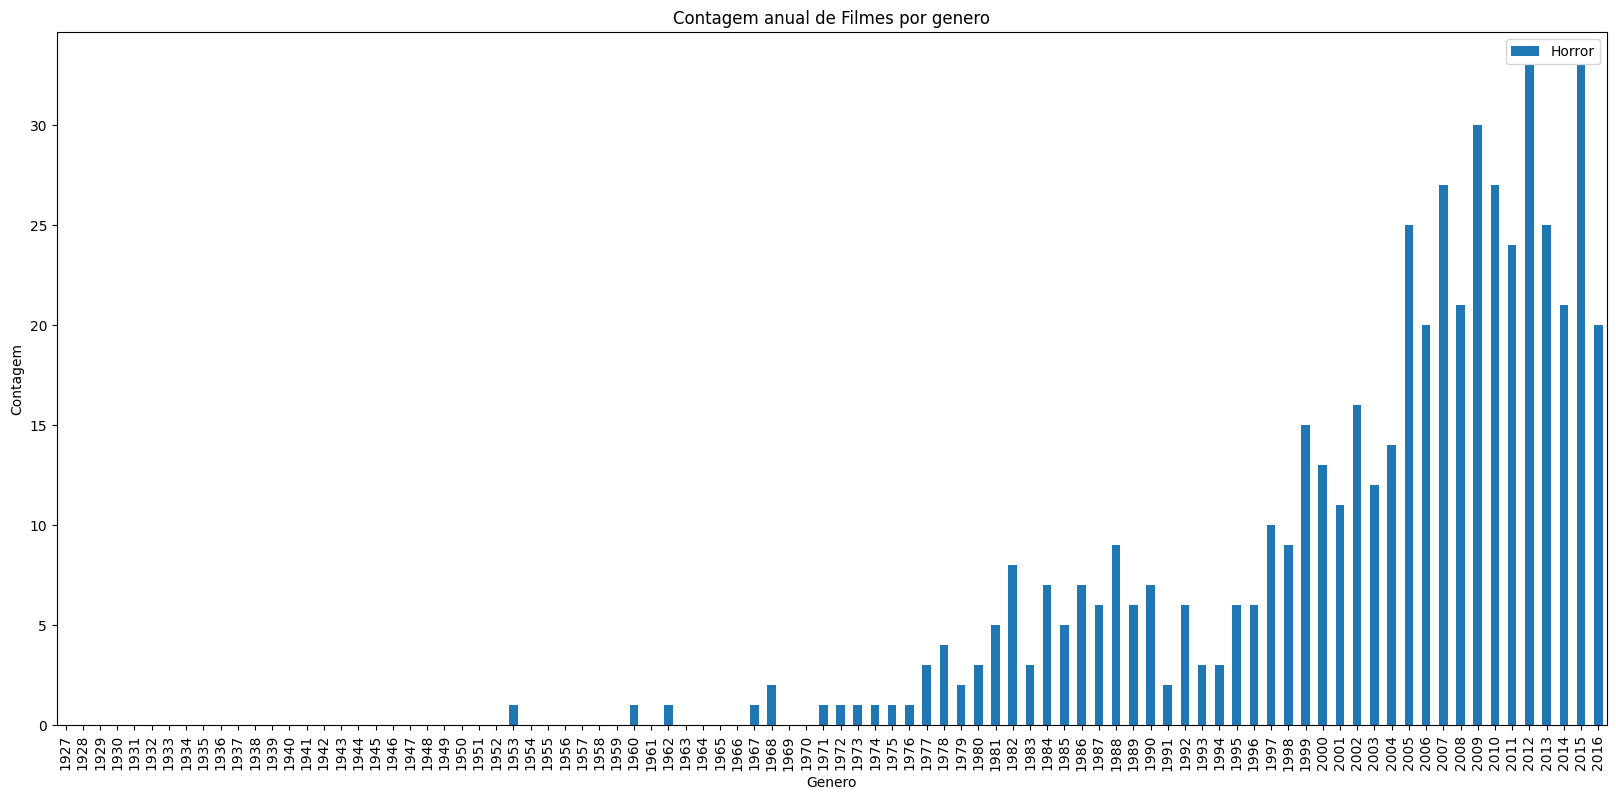

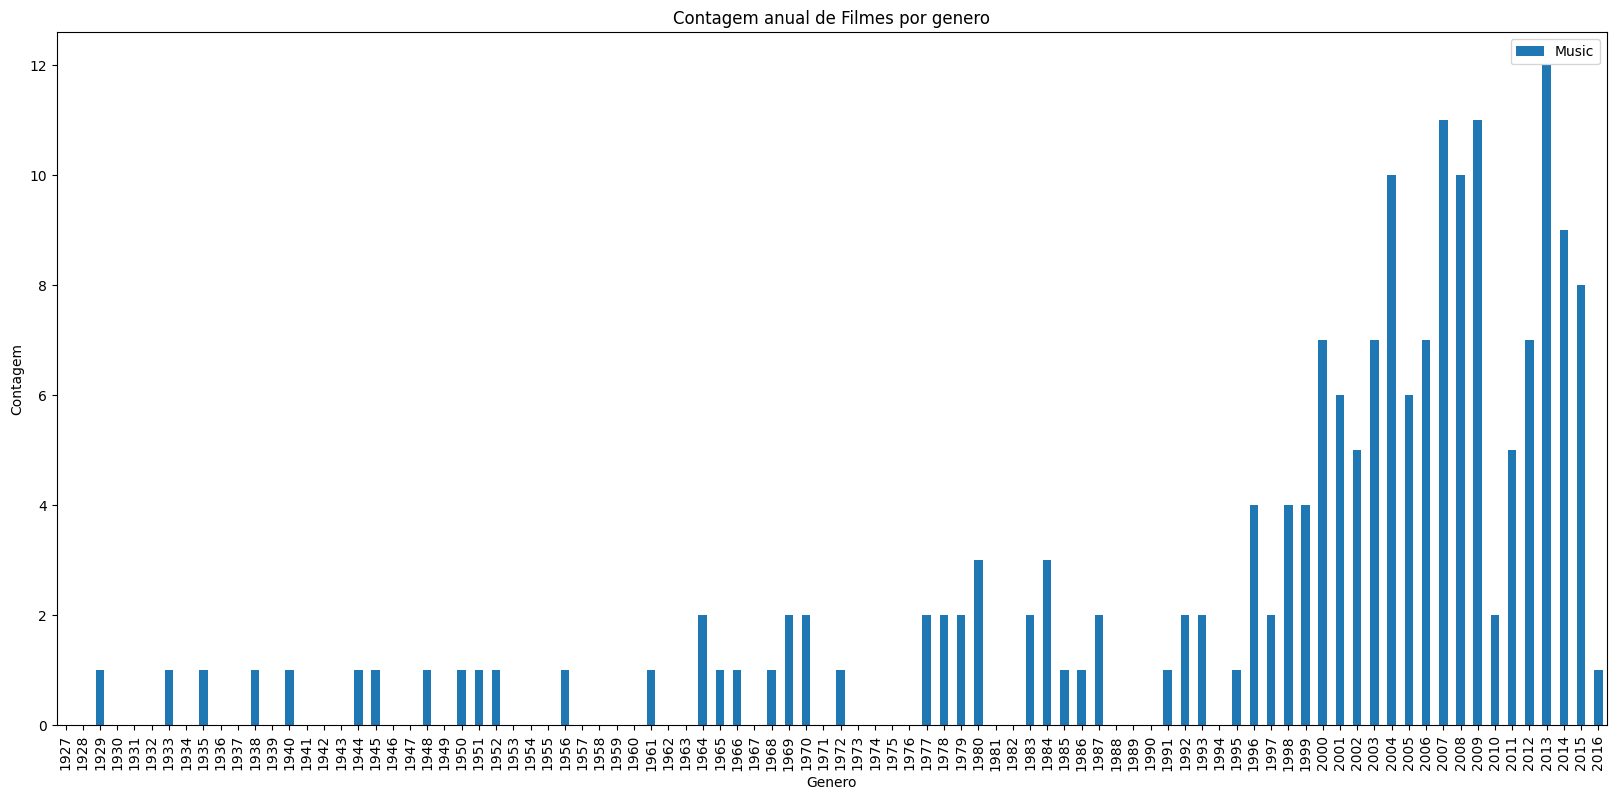

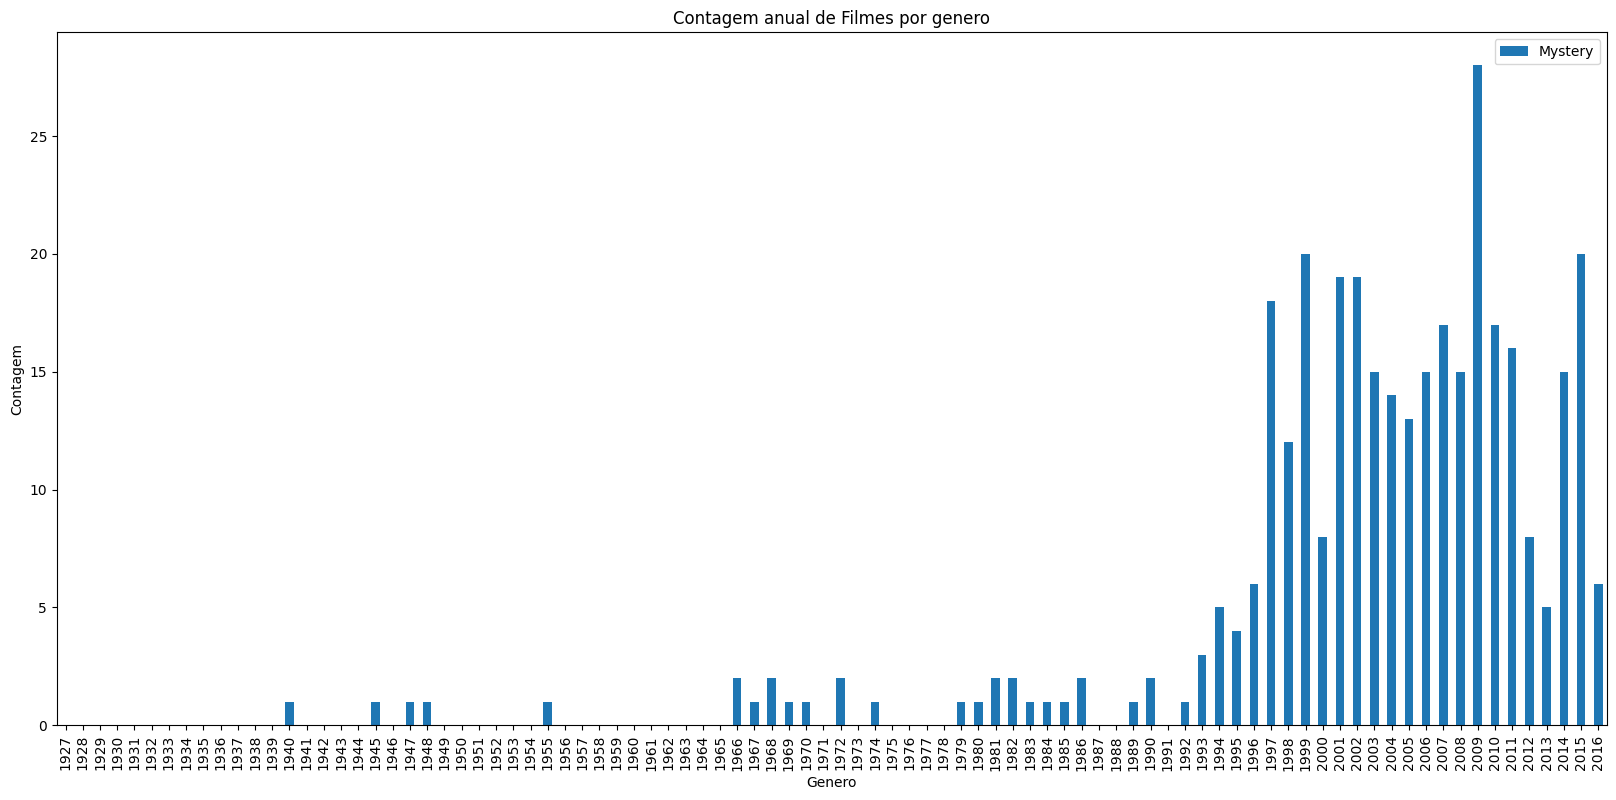

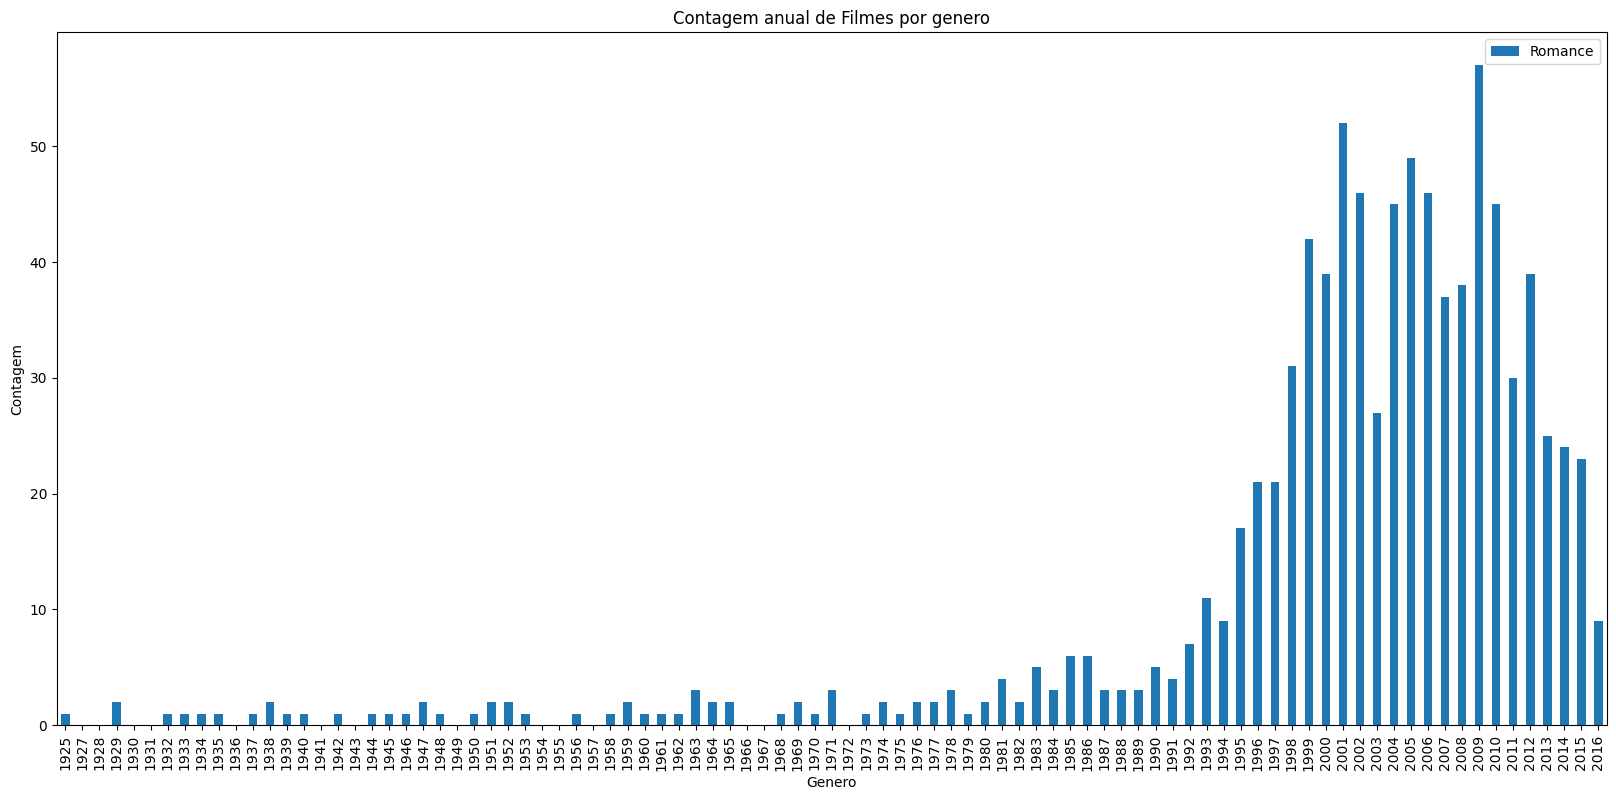

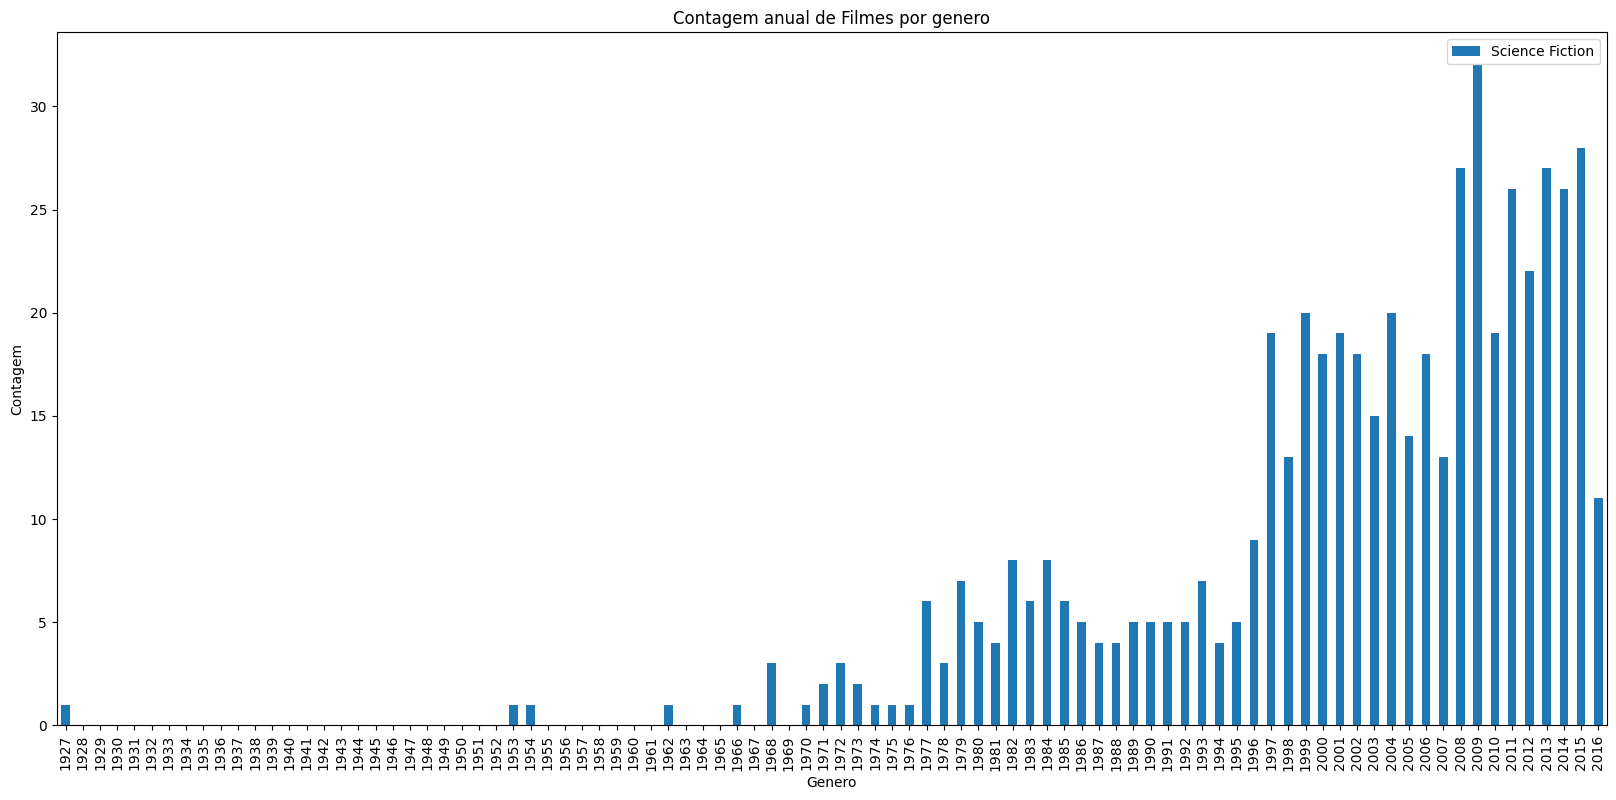

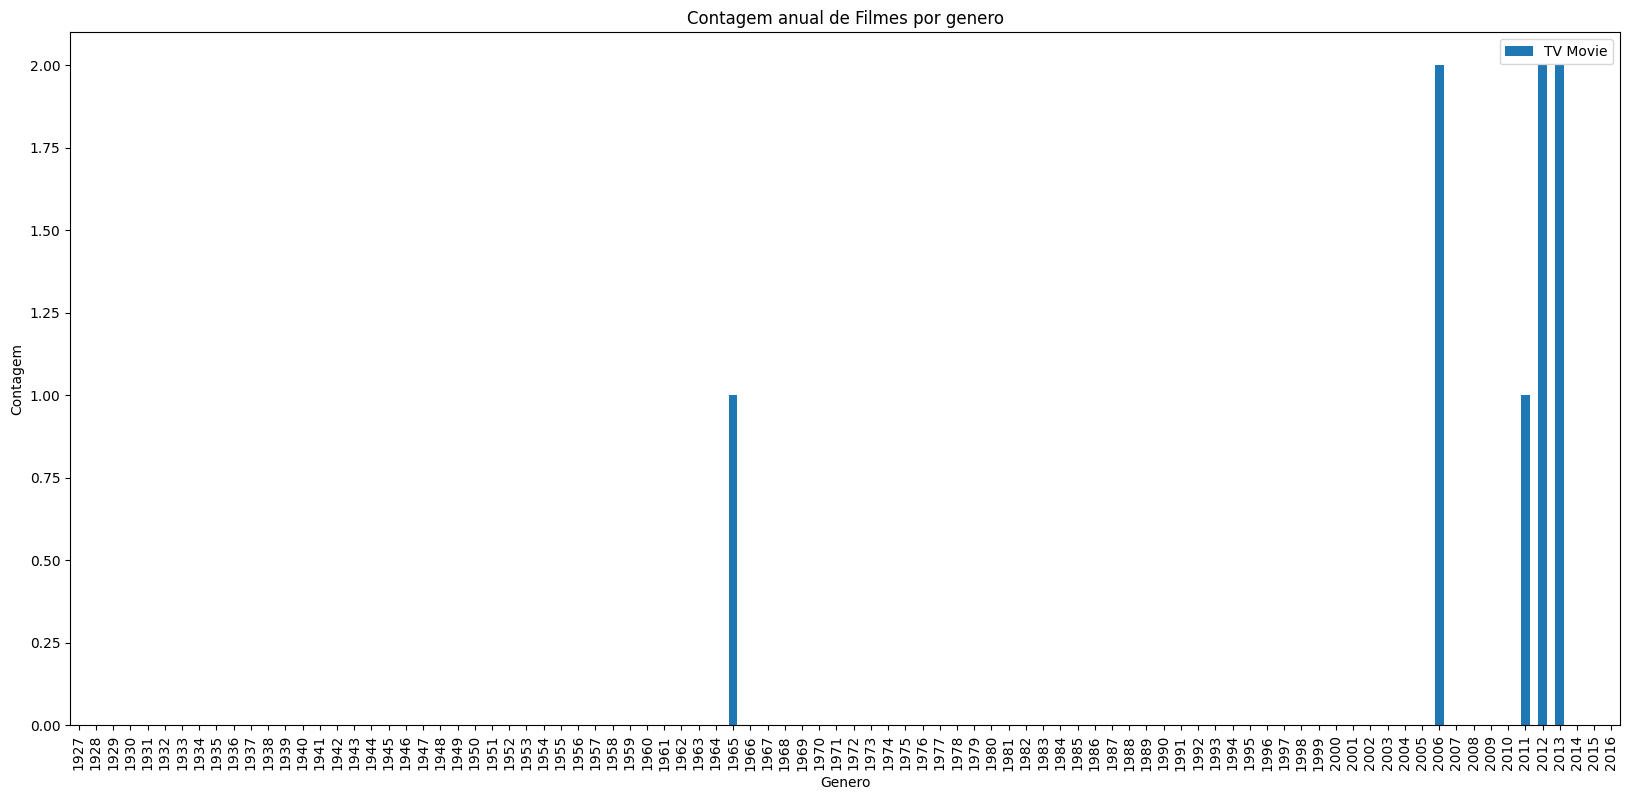

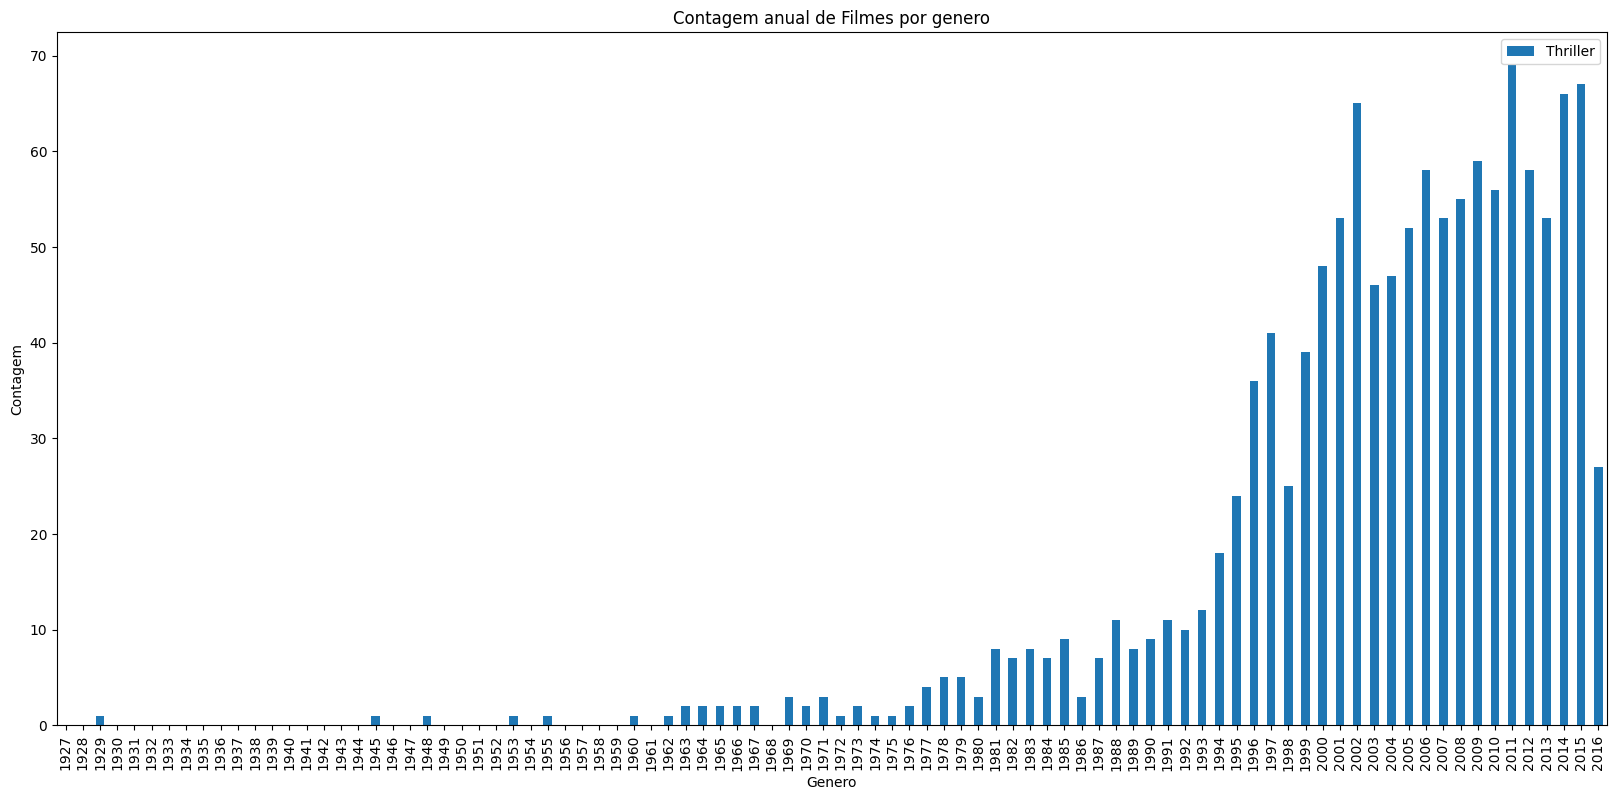

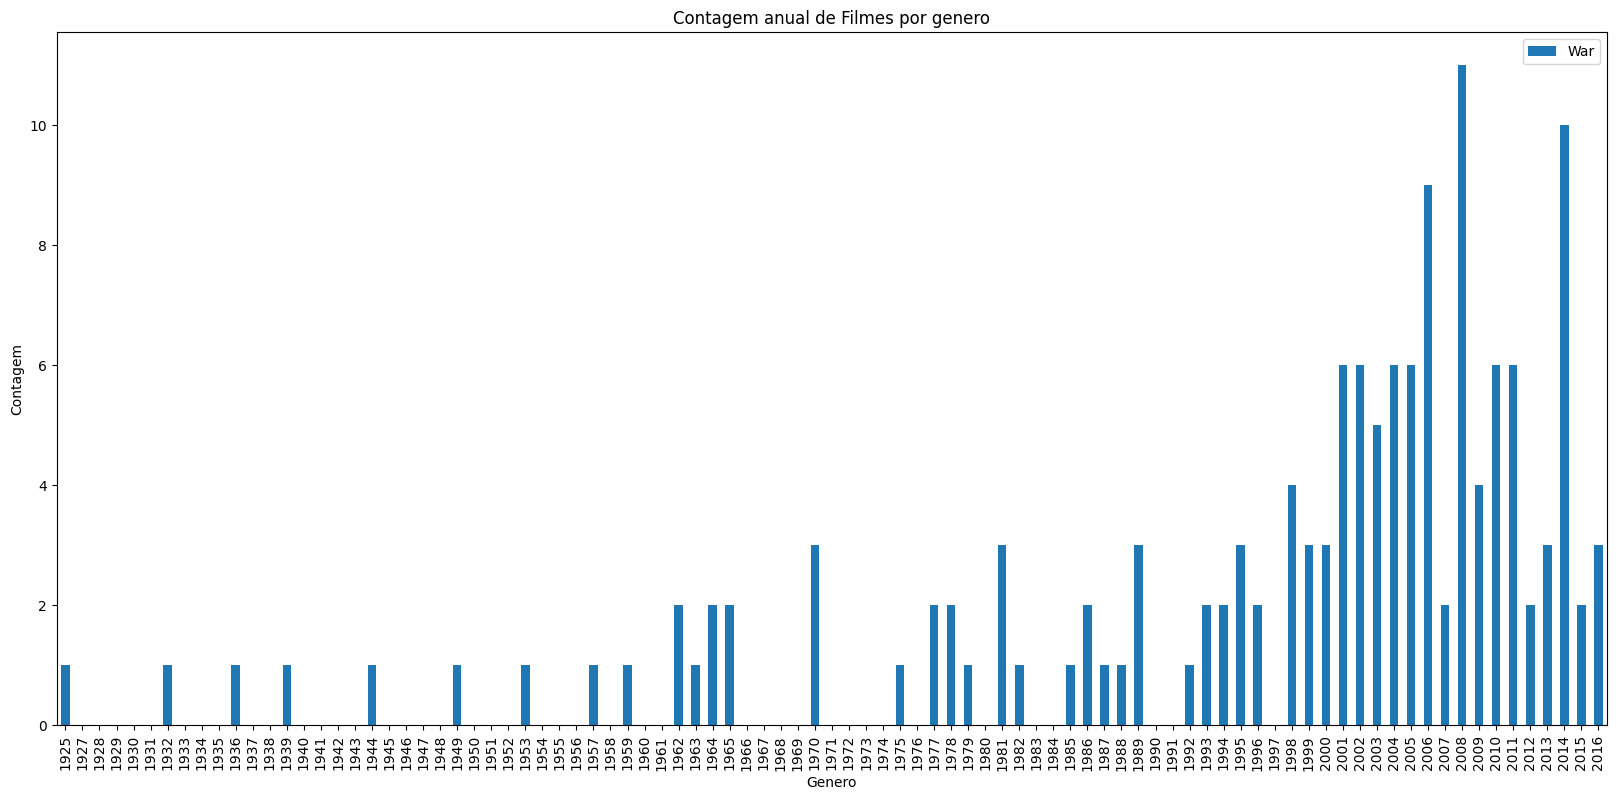

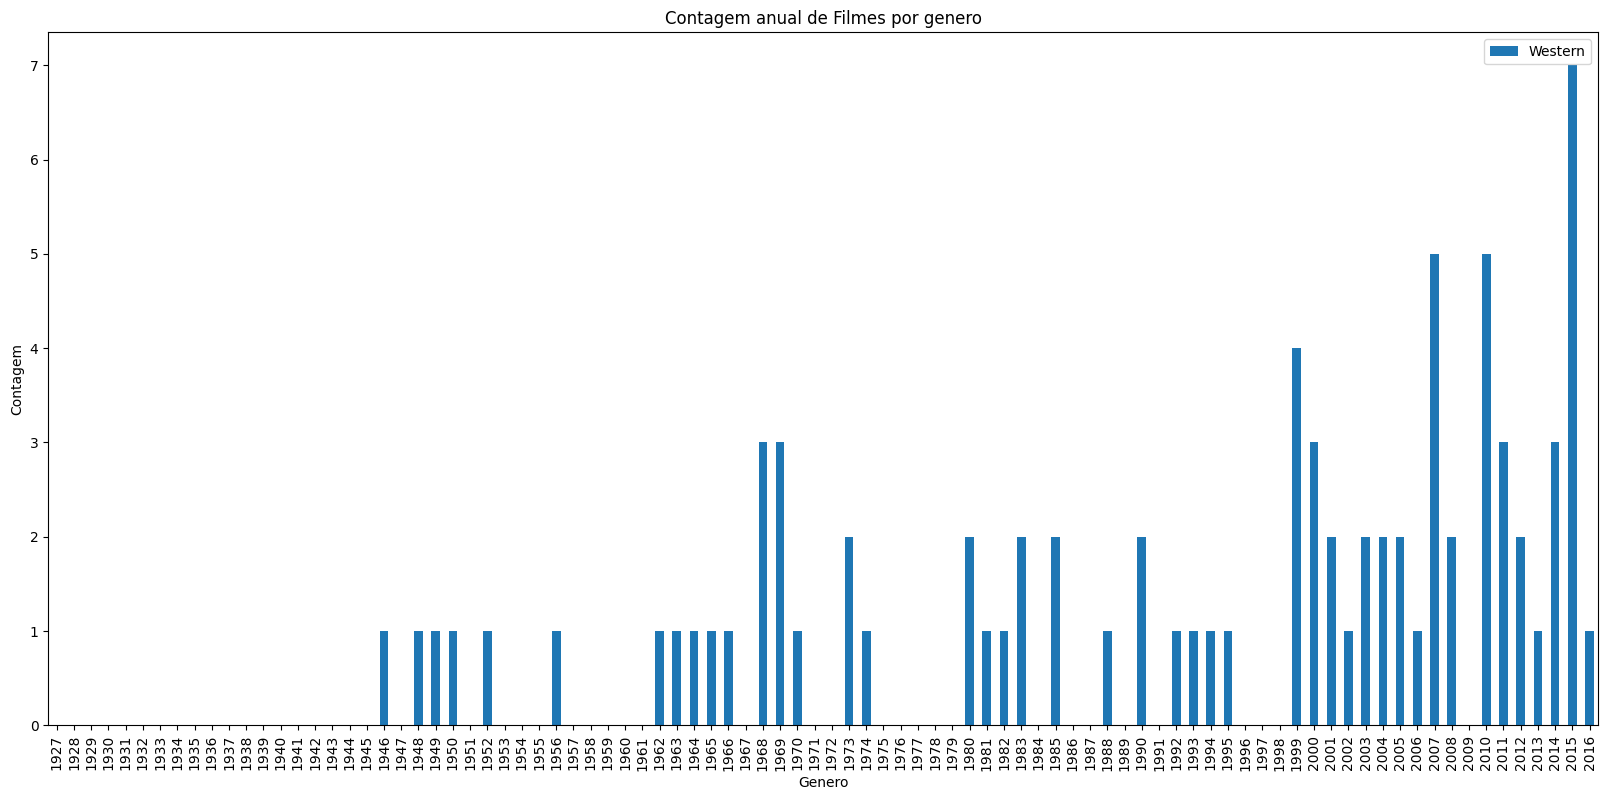

In [551]:
genero_ano = tmdb[['Ano','generos',tmdb.columns[3]]]
genero_ano = genero_ano.explode('generos')
genero_ano = genero_ano.groupby(['generos','Ano'],).count()
genero_ano = genero_ano.reset_index()

vazia = pd.DataFrame()
vazia['Ano'] = [str(ano) for ano in range(1927,2017)]
vazia['id'] = 0.0

for g in genero_ano.generos.unique():
    aux = tmdb[['Ano','generos',tmdb.columns[3]]]
    aux = aux.explode('generos')
    aux = aux.groupby(['generos','Ano'],).count()
    aux = aux.reset_index()
    aux = aux.loc[aux.generos == g]
    tmp = aux.merge(vazia, how='outer', on = "Ano", left_index=False, right_index=False, sort=True, copy=None, indicator=True, validate=None).fillna(0)
    tmp['qtde'] = tmp.id_x+tmp.id_y
    tmp[['Ano','qtde']]
      
    tmp.plot(kind='bar',figsize=(20,9),x='Ano',y='qtde',label=g)
    plt.title('Contagem anual de Filmes por genero')
    plt.xlabel('Genero')
    plt.ylabel('Contagem')
    plt.xticks(rotation=90)
    plt.show()


In [558]:
tmdb_gen = tmdb.explode('generos')

In [567]:
tmdb_gen[tmdb_gen.generos=='Action'].sort_values(by='vote_average',ascending=False).loc[:;100]


SyntaxError: invalid syntax (360193469.py, line 1)